In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latlong=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        latlong.append(lat_lng)
# Print the city count to confirm sufficient count
len(cities)

627

In [3]:
temperature =[]
humidity=[]
cloudiness=[]
wind_speed=[]
countries = []
datetime= []
count=0

for city in cities:
    # Build query URL
    count =  count + 1
    try:
        query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={city}&units=imperial"
        data = requests.get(query_url).json()
        
        #pull data
        temp= data["main"]["temp"]
        humid= data["main"]["humidity"]
        cloud= data["clouds"]["all"]
        wind= data["wind"]["speed"]
        country=data["sys"]["country"]
        timezone= data["timezone"]
    
       #append item to list
        temperature.append(temp)
        humidity.append(humid)
        cloudiness.append(cloud)
        wind_speed.append(wind)
        countries.append(country)
        datetime.append(timezone)
        
        #print log
        print(f"Record {count} processed: {city}")

    except:
        print(f"Error: {city} not found")
        temperature.append("n/a")
        humidity.append("n/a")
        cloudiness.append("n/a")
        wind_speed.append("n/a")
        countries.append("n/a")
        datetime.append("n/a")
    
    time.sleep(1)
    

    

Record 1 processed: raudeberg
Record 2 processed: rikitea
Record 3 processed: yellowknife
Record 4 processed: margate
Record 5 processed: cape town
Error: mys shmidta not found
Record 7 processed: dikson
Record 8 processed: thompson
Record 9 processed: marawi
Record 10 processed: ushuaia
Record 11 processed: airai
Record 12 processed: tuktoyaktuk
Record 13 processed: ilulissat
Record 14 processed: puerto ayora
Record 15 processed: nanortalik
Record 16 processed: vaini
Record 17 processed: anadyr
Record 18 processed: faanui
Record 19 processed: mahebourg
Record 20 processed: kavieng
Record 21 processed: grand baie
Record 22 processed: pacific grove
Record 23 processed: gusau
Record 24 processed: punta arenas
Record 25 processed: koraput
Record 26 processed: hilo
Record 27 processed: tasiilaq
Record 28 processed: salalah
Record 29 processed: tuatapere
Record 30 processed: castro
Record 31 processed: narsaq
Record 32 processed: ende
Record 33 processed: shache
Record 34 processed: holalke

Record 269 processed: arraial do cabo
Record 270 processed: high level
Error: saleaula not found
Record 272 processed: eldorado
Record 273 processed: trelew
Record 274 processed: arman
Record 275 processed: half moon bay
Record 276 processed: makinsk
Record 277 processed: luderitz
Error: ust-kamchatsk not found
Record 279 processed: chapais
Record 280 processed: labuhan
Record 281 processed: sao filipe
Record 282 processed: uglegorsk
Record 283 processed: zhezkazgan
Record 284 processed: mackay
Record 285 processed: manuk mangkaw
Record 286 processed: contai
Record 287 processed: richards bay
Record 288 processed: belaya gora
Record 289 processed: opuwo
Record 290 processed: usinsk
Error: tsihombe not found
Record 292 processed: khani
Record 293 processed: nemuro
Record 294 processed: mgandu
Record 295 processed: machinga
Record 296 processed: faya
Record 297 processed: sao joao da barra
Error: burica not found
Record 299 processed: candolim
Record 300 processed: sept-iles
Record 301 p

Record 537 processed: etchojoa
Record 538 processed: shieli
Record 539 processed: luhyny
Record 540 processed: kodinsk
Error: lalomanu not found
Record 542 processed: poya
Record 543 processed: rio grande
Record 544 processed: bathsheba
Record 545 processed: ganzhou
Record 546 processed: sibolga
Record 547 processed: sarankhola
Record 548 processed: ocala
Record 549 processed: tartus
Record 550 processed: charyshskoye
Record 551 processed: yerbogachen
Record 552 processed: nam som
Record 553 processed: along
Record 554 processed: fez
Record 555 processed: ajaccio
Record 556 processed: sayan
Record 557 processed: sangmelima
Record 558 processed: wolmirstedt
Record 559 processed: nha trang
Record 560 processed: greenbelt
Record 561 processed: ancud
Record 562 processed: esmeraldas
Record 563 processed: houma
Record 564 processed: kirakira
Record 565 processed: traverse city
Record 566 processed: sulecin
Record 567 processed: pa sang
Error: saryshagan not found
Record 569 processed: harge

In [4]:
# see data response
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q=London&units=imperial"
data = requests.get(query_url).json()
data


{'coord': {'lon': -0.1257, 'lat': 51.5085},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 37.22,
  'feels_like': 31.05,
  'temp_min': 34,
  'temp_max': 40.75,
  'pressure': 1024,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 8.3, 'deg': 291, 'gust': 22.91},
 'clouds': {'all': 6},
 'dt': 1644210199,
 'sys': {'type': 2,
  'id': 2019646,
  'country': 'GB',
  'sunrise': 1644218964,
  'sunset': 1644253195},
 'timezone': 0,
 'id': 2643743,
 'name': 'London',
 'cod': 200}

In [5]:
#unzip latitude and longitude from each other
#https://www.kite.com/python/answers/how-to-unzip-a-list-of-tuples-in-python

unzipped_object = zip(*latlong)
unzipped_list = list(unzipped_object)


In [30]:
#data frame
df=pd.DataFrame()
df["city"]=cities
df["lat_long"]=latlong
df["latitude"]=unzipped_list[0]
df["longitude"]=unzipped_list[1]
df["temperature"]=temperature
df["humidity"]=humidity
df["cloudiness"]=cloudiness
df["wind_speed"]=wind_speed
df['country']= country
df["timezone"]= datetime
df

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone
0,raudeberg,"(63.58902360898884, 2.867203051415771)",63.589024,2.867203,37.87,87,90,1.99,IQ,3600
1,rikitea,"(-36.31850794653735, -110.4928982258566)",-36.318508,-110.492898,78.98,72,10,17.98,IQ,-32400
2,yellowknife,"(84.90294674751334, -112.96270506552527)",84.902947,-112.962705,-7.04,90,0,0,IQ,-25200
3,margate,"(-34.243375269255644, 34.935160871335626)",-34.243375,34.935161,39.76,72,11,8.99,IQ,0
4,cape town,"(-65.00102316551985, -8.614653840596475)",-65.001023,-8.614654,63.57,88,75,1.99,IQ,7200
...,...,...,...,...,...,...,...,...,...,...
622,fernley,"(39.18770408711677, -119.32625581584874)",39.187704,-119.326256,39.29,45,0,1.83,IQ,-28800
623,kununurra,"(-15.626787989418688, 126.14353420755373)",-15.626788,126.143534,91.38,55,100,9.22,IQ,28800
624,daru,"(-10.789038040296575, 143.39130492611048)",-10.789038,143.391305,83.53,77,98,5.06,IQ,36000
625,kifri,"(35.26799060528005, 45.1737224274878)",35.267991,45.173722,46.85,47,31,2.82,IQ,10800


In [31]:
#clean up

#drop n/a
mask = df.temperature != "n/a"
df2= df.loc[mask]

df2


,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone
0,raudeberg,"(63.58902360898884, 2.867203051415771)",63.589024,2.867203,37.87,87,90,1.99,IQ,3600
1,rikitea,"(-36.31850794653735, -110.4928982258566)",-36.318508,-110.492898,78.98,72,10,17.98,IQ,-32400
2,yellowknife,"(84.90294674751334, -112.96270506552527)",84.902947,-112.962705,-7.04,90,0,0,IQ,-25200
3,margate,"(-34.243375269255644, 34.935160871335626)",-34.243375,34.935161,39.76,72,11,8.99,IQ,0
4,cape town,"(-65.00102316551985, -8.614653840596475)",-65.001023,-8.614654,63.57,88,75,1.99,IQ,7200
...,...,...,...,...,...,...,...,...,...,...
621,ashland,"(41.87321248297343, -122.32630595045384)",41.873212,-122.326306,26.33,93,100,8.12,IQ,-18000
622,fernley,"(39.18770408711677, -119.32625581584874)",39.187704,-119.326256,39.29,45,0,1.83,IQ,-28800
623,kununurra,"(-15.626787989418688, 126.14353420755373)",-15.626788,126.143534,91.38,55,100,9.22,IQ,28800
624,daru,"(-10.789038040296575, 143.39130492611048)",-10.789038,143.391305,83.53,77,98,5.06,IQ,36000


In [32]:
#drop when humidity exceeds 100 (for every pull from api)
mask = df2.humidity <= 100
df3 = df2.loc[mask]
df3

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone
0,raudeberg,"(63.58902360898884, 2.867203051415771)",63.589024,2.867203,37.87,87,90,1.99,IQ,3600
1,rikitea,"(-36.31850794653735, -110.4928982258566)",-36.318508,-110.492898,78.98,72,10,17.98,IQ,-32400
2,yellowknife,"(84.90294674751334, -112.96270506552527)",84.902947,-112.962705,-7.04,90,0,0,IQ,-25200
3,margate,"(-34.243375269255644, 34.935160871335626)",-34.243375,34.935161,39.76,72,11,8.99,IQ,0
4,cape town,"(-65.00102316551985, -8.614653840596475)",-65.001023,-8.614654,63.57,88,75,1.99,IQ,7200
...,...,...,...,...,...,...,...,...,...,...
621,ashland,"(41.87321248297343, -122.32630595045384)",41.873212,-122.326306,26.33,93,100,8.12,IQ,-18000
622,fernley,"(39.18770408711677, -119.32625581584874)",39.187704,-119.326256,39.29,45,0,1.83,IQ,-28800
623,kununurra,"(-15.626787989418688, 126.14353420755373)",-15.626788,126.143534,91.38,55,100,9.22,IQ,28800
624,daru,"(-10.789038040296575, 143.39130492611048)",-10.789038,143.391305,83.53,77,98,5.06,IQ,36000


In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 625
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         579 non-null    object 
 1   lat_long     579 non-null    object 
 2   latitude     579 non-null    float64
 3   longitude    579 non-null    float64
 4   temperature  579 non-null    object 
 5   humidity     579 non-null    object 
 6   cloudiness   579 non-null    object 
 7   wind_speed   579 non-null    object 
 8   country      579 non-null    object 
 9   timezone     579 non-null    object 
dtypes: float64(2), object(8)
memory usage: 49.8+ KB


In [34]:
#make objects into floats


df3.temperature = df3.temperature.astype(float)
df3.humidity= df3.humidity.astype(float)
df3.cloudiness= df3.cloudiness.astype(float)
df3.wind_speed = df3.wind_speed.astype(float)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 579 entries, 0 to 625
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   city         579 non-null    object 
 1   lat_long     579 non-null    object 
 2   latitude     579 non-null    float64
 3   longitude    579 non-null    float64
 4   temperature  579 non-null    float64
 5   humidity     579 non-null    float64
 6   cloudiness   579 non-null    float64
 7   wind_speed   579 non-null    float64
 8   country      579 non-null    object 
 9   timezone     579 non-null    object 
dtypes: float64(6), object(4)
memory usage: 49.8+ KB


# Scatter plots

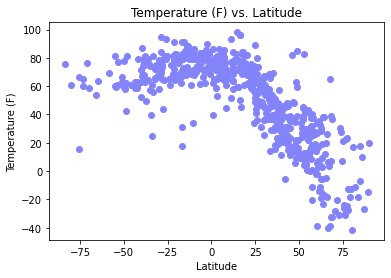

Scatter plot shows the relationship between temperature (F) and latitude. In the Southern Hemisphere, temperature stays roughly between 60-100 (F) and in the Northern Hemisphere, the temperature roughly decreases as the latitude increases.


<Figure size 432x288 with 0 Axes>

In [54]:
#scatterplots: Temperature (F) vs. Latitude

plt.scatter(df3.latitude, df3.temperature, color="#8383fa")

#axis titles
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')


plt.show()

#export to png
plt.savefig("Images/Temperature (F) vs. Latitude.png")

print(f"Scatter plot shows the relationship between temperature (F) and latitude. In the Southern Hemisphere, temperature stays roughly between 60-100 (F) and in the Northern Hemisphere, the temperature roughly decreases as the latitude increases.")
      

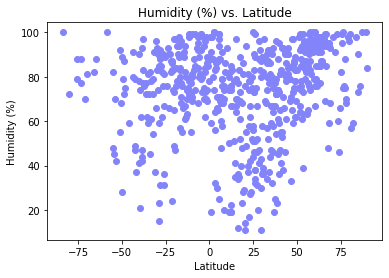

Scatter plot shows the relationship between humidity and latitude.


<Figure size 432x288 with 0 Axes>

In [58]:
#scatterplots: Humidity (%) vs. Latitude

plt.scatter(df3.latitude, df3.humidity, color="#8383fa")

#axis titles
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.show()

#export to png
plt.savefig("Images/Humidity vs Latitude.png")

print(f"Scatter plot shows the relationship between humidity and latitude.")


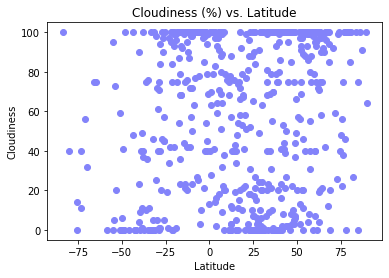

Scatter plot shows the relationship between cloudiness (%) and latitude.


<Figure size 432x288 with 0 Axes>

In [60]:
#scatterplots: Cloudiness (%) vs. Latitude

plt.scatter(df3.latitude, df3.cloudiness, color="#8383fa")

#axis titles
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')


plt.show()

#export to png
plt.savefig("Images/Cloudiness vs. Latitude.png")

print(f"Scatter plot shows the relationship between cloudiness (%) and latitude.")

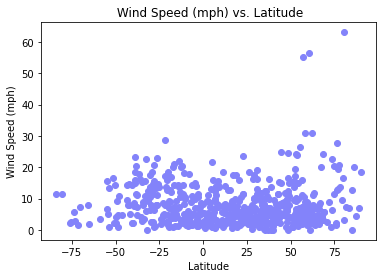

Scatter plot shows the relationship between wind speed (mph) and latitude.


<Figure size 432x288 with 0 Axes>

In [61]:
#scatterplots:  Wind Speed (mph) vs. Latitude

plt.scatter(df3.latitude, df3.wind_speed, color="#8383fa")

#axis titles
plt.title(' Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.show()

#export to png
plt.savefig("Images/Wind Speed (mph) vs. Latitude.png")

#print statement on scatterplot
print(f"Scatter plot shows the relationship between wind speed (mph) and latitude.")

# Bins for Hemisphere

In [39]:
#binning

bins= [-5000, -0.00001, 5000]

group_names= ["Southern", "Northern"]

df3["Hemisphere"] = pd.cut(df3["latitude"], bins, labels=group_names, include_lowest=True)
df3

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone,Hemisphere
0,raudeberg,"(63.58902360898884, 2.867203051415771)",63.589024,2.867203,37.87,87.0,90.0,1.99,IQ,3600,Northern
1,rikitea,"(-36.31850794653735, -110.4928982258566)",-36.318508,-110.492898,78.98,72.0,10.0,17.98,IQ,-32400,Southern
2,yellowknife,"(84.90294674751334, -112.96270506552527)",84.902947,-112.962705,-7.04,90.0,0.0,0.00,IQ,-25200,Northern
3,margate,"(-34.243375269255644, 34.935160871335626)",-34.243375,34.935161,39.76,72.0,11.0,8.99,IQ,0,Southern
4,cape town,"(-65.00102316551985, -8.614653840596475)",-65.001023,-8.614654,63.57,88.0,75.0,1.99,IQ,7200,Southern
...,...,...,...,...,...,...,...,...,...,...,...
621,ashland,"(41.87321248297343, -122.32630595045384)",41.873212,-122.326306,26.33,93.0,100.0,8.12,IQ,-18000,Northern
622,fernley,"(39.18770408711677, -119.32625581584874)",39.187704,-119.326256,39.29,45.0,0.0,1.83,IQ,-28800,Northern
623,kununurra,"(-15.626787989418688, 126.14353420755373)",-15.626788,126.143534,91.38,55.0,100.0,9.22,IQ,28800,Southern
624,daru,"(-10.789038040296575, 143.39130492611048)",-10.789038,143.391305,83.53,77.0,98.0,5.06,IQ,36000,Southern


In [40]:
#save data frame to csv
df3.to_csv("weather_data.csv", encoding="utf-8", index=False)

# Linear Regression

In [62]:
#create northern hemisphere data dataframe
mask = df3.Hemisphere == "Northern"
north = df3.loc[mask]
north.head()

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone,Hemisphere
0,raudeberg,"(63.58902360898884, 2.867203051415771)",63.589024,2.867203,37.87,87.0,90.0,1.99,IQ,3600,Northern
2,yellowknife,"(84.90294674751334, -112.96270506552527)",84.902947,-112.962705,-7.04,90.0,0.0,0.00,IQ,-25200,Northern
6,dikson,"(79.94875509088854, 75.61636109978298)",79.948755,75.616361,-12.95,96.0,100.0,16.55,IQ,25200,Northern
7,thompson,"(62.89857753710805, -101.18941174294798)",62.898578,-101.189412,-5.64,77.0,75.0,4.61,IQ,-21600,Northern
8,marawi,"(17.703694085142956, 28.340947607951193)",17.703694,28.340948,72.64,52.0,66.0,7.54,IQ,28800,Northern


In [63]:
#create southern hemisphere data dataframe
mask = df3.Hemisphere == "Southern"
south = df3.loc[mask]
south.head()

,city,lat_long,latitude,longitude,temperature,humidity,cloudiness,wind_speed,country,timezone,Hemisphere
1,rikitea,"(-36.31850794653735, -110.4928982258566)",-36.318508,-110.492898,78.98,72.0,10.0,17.98,IQ,-32400,Southern
3,margate,"(-34.243375269255644, 34.935160871335626)",-34.243375,34.935161,39.76,72.0,11.0,8.99,IQ,0,Southern
4,cape town,"(-65.00102316551985, -8.614653840596475)",-65.001023,-8.614654,63.57,88.0,75.0,1.99,IQ,7200,Southern
9,ushuaia,"(-80.38802052389195, -63.29713153227124)",-80.388021,-63.297132,60.46,72.0,40.0,11.50,IQ,-10800,Southern
13,puerto ayora,"(-13.725069900363778, -104.96095506291005)",-13.725070,-104.960955,73.54,94.0,21.0,7.36,IQ,-21600,Southern


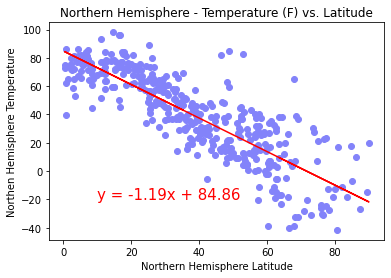

There is a negative correlation between latitude and temperature. The more north, the more the temperature decreases.


<Figure size 432x288 with 0 Axes>

In [73]:
# linear regression for Northern Hemisphere - Temperature (F) vs. Latitude

#resource for error: https://stackify.dev/843433-attributeerror-float-object-has-no-attribute-shape-when-using-linregress
# Add the linear regression equation and line to plot
x_values = north["latitude"]
y_values = north["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northen Hemisphere Temperature')
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.show()

#export to png
plt.savefig("Images/Northern Hemisphere - Temperature (F) vs. Latitude.png")

#explanation
print(f"There is a negative correlation between latitude and temperature. The more north, the more the temperature decreases.")


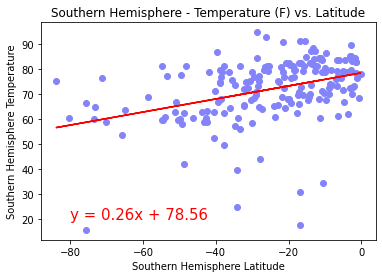

There is a positive correlation between latitude and temperature in the southern hemisphere. The more south, the more the temperature increases.


<Figure size 432x288 with 0 Axes>

In [74]:
# linear regression for Southern Hemisphere - Temperature (F) vs. Latitude

# Add the linear regression equation and line to plot
x_values = south["latitude"]
y_values = south["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Temperature')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.show()

#export to png
plt.savefig("Images/Southern Hemisphere - Temperature (F) vs. Latitude.png")

#explanation
print(f"There is a positive correlation between latitude and temperature in the southern hemisphere. The more south, the more the temperature increases.")


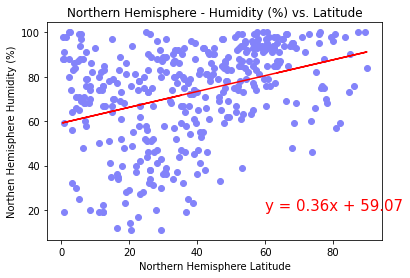

There is a positive correlation between latitude and temperature in the southern hemisphere. The more south, the more the temperature increases.


<Figure size 432x288 with 0 Axes>

In [70]:
# linear regression for Northern Hemisphere - Humidity (%) vs. Latitude

# Add the linear regression equation and line to plot
x_values = north["latitude"]
y_values = north["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northen Hemisphere Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.show()

#export to png
plt.savefig("Images/Northern Hemisphere - Humidity (%) vs. Latitude.png")

#explanation
print(f"There is a positive correlation between latitude and humidity in the northern hemisphere. The more north, the more the humidity increases.")


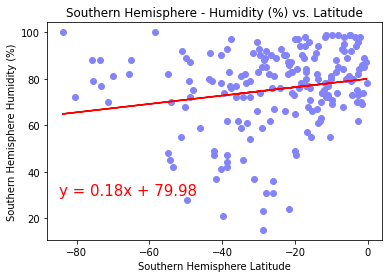

There is a positive correlation between latitude and humidity in the southern hemisphere. The more south, the more the humidity increases, though to a lesser degree than in the north.


<Figure size 432x288 with 0 Axes>

In [75]:
# linear regression for Southern Hemisphere - Humidity (%) vs. Latitude

# Add the linear regression equation and line to plot
x_values = south["latitude"]
y_values = south["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-85,30),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.show()

#export to png
plt.savefig("Images/Southern Hemisphere - Humidity (%) vs. Latitude.png")

#explanation
print(f"There is a positive correlation between latitude and humidity in the southern hemisphere. The more south, the more the humidity increases, though to a lesser degree than in the north.")


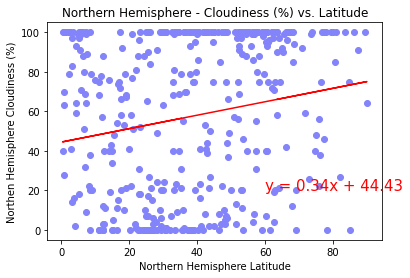

There is a positive correlation between latitude and cloudiness (%) in the northern hemisphere, but the line of regression is not meaningfully predictive.


<Figure size 432x288 with 0 Axes>

In [76]:
# linear regression for Northern Hemisphere - Cloudiness (%) vs. Latitude


# Add the linear regression equation and line to plot
x_values = north["latitude"]
y_values = north["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(60,20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northen Hemisphere Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.show()


#export to png
plt.savefig("Images/Northern Hemisphere - Cloudiness (%) vs. Latitude.png")

#explanation
print(f"There is a positive correlation between latitude and cloudiness (%) in the northern hemisphere, but the line of regression is not meaningfully predictive.")


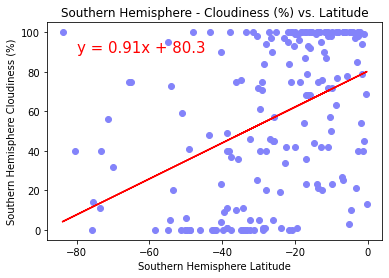

In [48]:
# linear regression for Southern Hemisphere - Cloudiness (%) vs. Latitude


# Add the linear regression equation and line to plot
x_values = south["latitude"]
y_values = south["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,90),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.show()

#export to png
plt.savefig("Images/Southern Hemisphere - Cloudiness (%) vs. Latitude.png")

#explanation
print(f"There is a positive correlation between latitude and cloudiness (%) in the southern hemisphere, but the line of regression is not meaningfully predictive.")


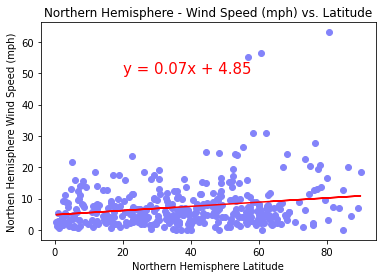

There is a minor positive correlation between latitude and wind speed (mph) in the northern hemisphere.


<Figure size 432x288 with 0 Axes>

In [77]:
# linear regression for Northern Hemisphere - Wind Speed (mph) vs. Latitude


# Add the linear regression equation and line to plot
x_values = north["latitude"]
y_values = north["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Latitude')
plt.ylabel('Northen Hemisphere Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.show()


#export to png
plt.savefig("Images/Northern Hemisphere - Wind Speed (mph) vs. Latitude.png")

#explanation
print(f"There is a minor positive correlation between latitude and wind speed (mph) in the northern hemisphere.")


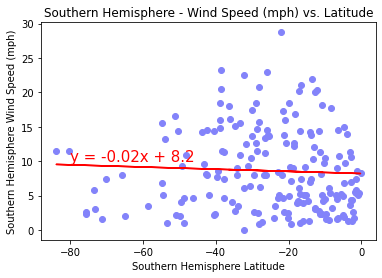

In [51]:
# linear regression for Southern Hemisphere - Wind Speed (mph) vs. Latitude


# Add the linear regression equation and line to plot
x_values = south["latitude"]
y_values = south["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values.astype(float))
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color="#8383fa")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,10),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Latitude')
plt.ylabel('Southern Hemisphere Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.show()


#export to png
plt.savefig("Images/Southern Hemisphere - Wind Speed (mph) vs. Latitude.png")

#explanation
print(f"There is a minor positive correlation between latitude and wind speed (mph) in the southern hemisphere, but the line of regression .")


Resources:
https://openweathermap.org/api/one-call-api
https://www.kite.com/python/answers/how-to-unzip-a-list-of-tuples-in-python 
https://stackify.dev/843433-attributeerror-float-object-has-no-attribute-shape-when-using-linregress